# Example 5-1: Periodic sampling of signals

Let us consider a signal defined by $x(t) = \sin(2\pi f t)$. The signal is analogue (continuous) since we know it for all possible t.

$$
x(t)=\: \mathbf{\sim \sim \sim \sim}
$$

An analogue signal is typically a voltage from a sensor, for instance, an accelerometer. It is impossible to store the analogue signal in a computer. We need to store an array of discrete values of the signal. It is common to sample the signal in a fixed sampling interval, for instance, $t_s=0.1  \: \text{Hz}$. 

$$
x_{[0:N]}=\: \{ \: x[0],x[1],x[2],,x[3],\dots,x[N] \: \},\quad x[n]=x(n \cdot t_s)
$$



This means that we store ten samples per second, and the sampling rate is $f_s=10 \: \text{Hz}$. To save storage space, we would like to store as few samples as possible while gathering all relevant information. 

## Aliasing

When gathering measurement data, one needs to be aware of aliasing (folding). Let us consider a harmonic function with a frequency of 20 Hz. The figure below shows the waveform with a very high sampling rate, which makes it very close to the analogue signal and the waveform was sampled at 22 Hz.

<img src=".\figures\Fig_x_1.svg">

The figure illustrates that it is difficult to draw the correct line based on the gathered samples, and most individuals would draw a line with a lower frequency than 20 Hz based on the points available. The bottom plot shows the Fourier amplitudes of the real waveform and the Fourier amplitudes of the samples gathered at 22 Hz. The peak of the Fourier amplitudes of the sampled signal is far lower than it should be, and this illustrates that we have collected samples at too low sampling rate. This phenomenon is called aliasing or folding. Let us consider a sine wave defined by



$$x(t) = \sin(2 \pi f_0 t)  $$

The function is periodic, so we can write

$$x[n] = \sin(2 \pi f_0 n t_s) = \sin(2 \pi f_0 n t_s + 2\pi m)    $$

Here $t_s$ is the sampling interval, and $m$ is an integrer

$$x[n] = \sin \left( 2 \pi ( f_0 n t_s +  m ) \right)    $$

$$x[n] = \sin \left( 2 \pi \left( f_0 +  \frac{m}{n t_s} \right) n t_s \right)    $$

We can now introduce $f_s = 1/t_s$ and since both $m$ and $n$ are integers we can define $k = m/n$

$$x[n] = \sin \left( 2 \pi \left( f_0 +  kf_s \right) n t_s \right)    $$

The equation above means that we will get the same sampling values when sampling a waveform with frequencies $f_0$ and $f_0 +  kf_s$. Let us study this further by considering a sampling rate of 2 Hz. The equation above implies that waveforms with frequencies $f_0$ 1,3,5,7... will provide the same sampling values, which makes it impossible to tell which of the frequencies the waveform has from the gathered samples. This means that it is essential that the signal does not have a frequency content higher than 1 Hz when sampling at 2 Hz. This is called the Nyquist frequency $f_s/2$ and needs to be respected when converting an analogue signal to digital.


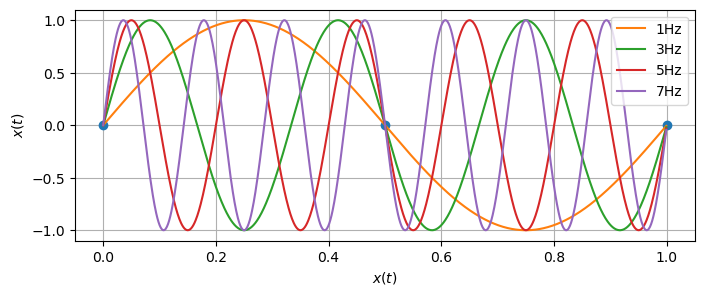

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy import signal as spsi

f0 = 1
fs = 2 # Sample rate

t = np.arange(0,1.1,1/fs)
y = np.sin(2*np.pi*f0*t)

tf = np.arange(0,1,1/1000)

plt.figure(figsize=(8,3))
plt.plot(t,y,'o')

# Plot signal with 1,3,5,7 Hz frequency
for k in range(4):
    plt.plot(tf,np.sin(2*np.pi*tf*(f0+k*fs)),label = str(f0+k*fs) + "Hz" )
plt.legend();
plt.grid()
plt.ylabel("$x(t)$");
plt.xlabel("$x(t)$");

We can also study the aliasing phenomenon by sampling a waveform with different sampling frequencies. We consider a waveform with the frequency $f_0$. The highest frequency we can capture without aliasing (folding) is $f_s/2$. This implies that we need to sample the signal at a sampling rate higher than 40 Hz. We will try to sample the signal at 41 Hz

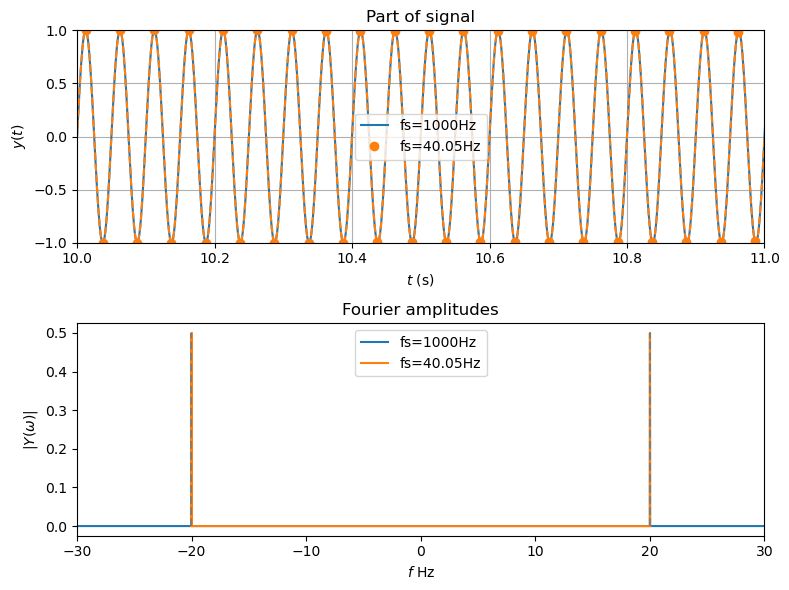

In [9]:
# Try to change the sampling rate
fs = 40.05

# Do not change code below
f = 20

tc = np.arange(0,100,1/1000)
yc = np.sin(2*np.pi*f*tc)

t = np.arange(0,100,1/fs)
if len(t) % 2 == 0: # Ensure the length of t is odd number
    t = t[0:-1]
    
y = np.sin(2*np.pi*f*t)

y_fft = np.fft.fft(y)/len(y)
y_fft = np.fft.fftshift(y_fft)
freq = np.linspace(-0.5,0.5,len(t))*fs

yc_fft = np.fft.fft(yc)/len(yc)
yc_fft = np.fft.fftshift(yc_fft)
freqc = np.linspace(-0.5,0.5,len(tc))*1000
    
yi, ti = spsi.resample(y,1000*100,t=t)

fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(tc,yc, label= "fs=" + "1000" + "Hz")
axs[0].set_title("Part of signal")
axs[0].plot(t,y,'o',color='C1',label= "fs=" + str(fs) + "Hz")
axs[0].plot(ti,yi,'--',color='C1')
axs[0].set_xlim(10,11)
axs[0].set_ylim(-1,1)
axs[0].set_ylabel("$y(t)$")
axs[0].set_xlabel("$t$ (s)")
axs[0].legend()
axs[0].grid(True)

axs[1].set_title("Fourier amplitudes")
axs[1].plot(freqc,np.abs(yc_fft),label= "fs=" + "1000" + "Hz")
axs[1].plot(freq,np.abs(y_fft),label= "fs=" + str(fs) + "Hz")
axs[1].set_ylabel("$|Y(\omega)|$")
axs[1].set_xlabel("$f$ Hz")
axs[1].vlines(0.5*fs,0,0.5,linestyle='--',alpha = 0.5)
axs[1].vlines(-0.5*fs,0,0.5,linestyle='--',alpha = 0.5)
axs[1].set_xlim(-30,30)
axs[1].legend()
plt.tight_layout()


Try to reduce the sampling rate and study the result.

We conclude that setting the sample rate correctly *before* performing measurements is very important. For a sample rate $f_s$ we can only reconstruct the frequency content in the range $ [ \: -\dfrac{f_s}{2}, \dfrac{f_s}{2}  \:]$.